<h2 style="text-align: center;">Bagging Classifier</h2>
<h3 style="text-align: center;">Machine Learning for Robotics</h3>
<h3 style="text-align: center;">Faculty: Dr. N.M. Elango</h3>

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Preprocess

In [2]:
df=pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.duplicated().sum()
# last two columns are very tall so I summarized its
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'T_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'T_2'},inplace=True)
df.drop(columns=['CLIENTNUM'],inplace=True)
#converting columns that have object data to numeric
lis=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
le=LabelEncoder()
for column in lis:
    df[column]=le.fit_transform(df[column])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,T_1,T_2
0,1,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<Axes: >

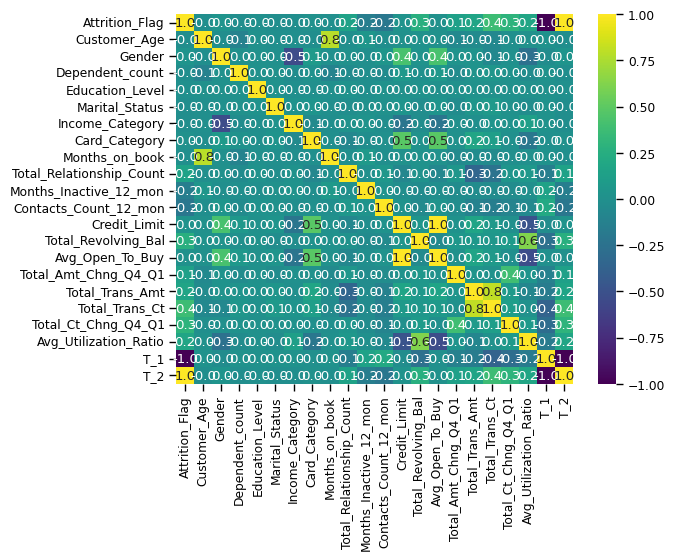

In [4]:
import seaborn
seaborn.set_context("paper", rc={"figure.figsize": (50, 8)})
seaborn.heatmap(data=df.corr(),annot=True,fmt=".1f",cmap='viridis')

In [5]:
X=df.drop(columns=['Attrition_Flag','T_1','T_2'])
y=df['Attrition_Flag']
X.shape,y.shape

((10127, 19), (10127,))

## Scale and Split

In [6]:
X=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

## Bagging Classifier with Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Base classifier
base_classifier = DecisionTreeClassifier()

# Bagging classifier with the updated parameter name
bagging_classifier = BaggingClassifier(estimator=base_classifier,
                                       n_estimators=50,
                                       max_samples=0.8, 
                                       max_features=1.0, 
                                       random_state=42)

# Fitting the bagging classifier
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=50, random_state=42)

In [10]:
y_pred=bagging_classifier.predict(X_test)

## Metrics

Accuracy: 96.35


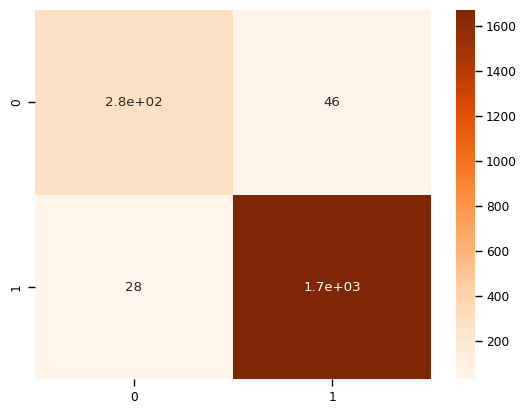

In [11]:
import seaborn as sns
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,cmap='Oranges')
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.2f}')